In [ ]:
!unzip '/content/house-prices-advanced-regression-techniques.zip'

Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
# 데이터확보
# EDA
# 모델선정
# 학습
# 결과 제출(배포 및 사이트 적용)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
temp = train.isnull().mean()
temp[temp > 0]

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [ ]:
#결측치가 0.5(50%) 이상인 컬럼은 학습데이터에서 제거
new_temp = temp[temp > 0]
new_temp[new_temp > 0.5]

Alley          0.937671
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

In [ ]:
drop_cols = new_temp[new_temp > 0.5].index
drop_cols

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [ ]:
train2 = train.drop(columns=drop_cols)

In [ ]:
temp = train2.isnull().sum()
temp[temp > 0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [ ]:
# 수치형은 평균
# 범주형은 최빈값으로 대처
temp[temp > 0].index

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [ ]:
temp_temp = train[ temp[temp > 0].index  ].dtypes
temp_temp[temp_temp == 'object'].index

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [ ]:
# mostValue = train2['MasVnrType'].value_counts().index[0]
# train2['MasVnrType'].fillna(mostValue)

# 남아있는 범주형 데이터의 결측치를 최빈값으로 대처
for col in temp_temp[temp_temp == 'object'].index:
  mostValue = train2[col].value_counts().index[0]
  train2[col].fillna(mostValue,inplace=True)

In [ ]:
temp_temp[temp_temp != 'object'].index

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [ ]:
for col in temp_temp[temp_temp != 'object'].index:
  meanValue = train2[col].mean()
  train2[col].fillna(meanValue,inplace=True)

In [ ]:
for col in temp_temp[temp_temp == 'object'].index:
  print(train2[col].value_counts())

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
Gd    1070
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64
Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unf    686
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
TA    1407
Fa      35
Gd     

In [ ]:
# one hot encoding
data = pd.get_dummies(train2)
data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=277)


In [ ]:
y = data['SalePrice']
X = data.drop(columns=['SalePrice'])

In [23]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [31]:
X_pca.shape, y.shape

((1460, 2), (1460,))

In [32]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [33]:
from sklearn.model_selection import cross_validate
scores = cross_validate(rfr,X,y, return_train_score=True)

In [35]:
scores['train_score'].mean(), scores['test_score'].mean()

(0.979302032975497, 0.8542786601722169)

R-squared 값(결정계수 Coefficeient of Determination)
  - 0 ~ 1 사이의 값을 가지며 클수록 모델의 변동성을 잘 설명한다

  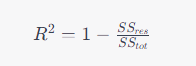

In [ ]:
# 분모 : 실제타겟값과 평균값 간의 차이의 제곱
# 분자 : 실제타겟값과 예측값간의 차이의 제곱의 합